## 最小二乘法

No handles with labels found to put in legend.


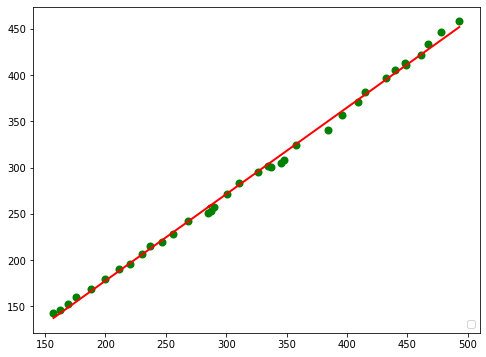

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import leastsq

Xi = np.array(
    [157, 162, 169, 176, 188, 200, 211, 220, 230, 237, 247, 256, 268, 287, 285, 290, 301, 311, 326, 335, 337, 345, 348,
     358, 384, 396, 409, 415, 432, 440, 448, 449, 461, 467, 478, 493], dtype=np.float)
Yi = np.array(
    [143, 146, 153, 160, 169, 180, 190, 196, 207, 215, 220, 228, 242, 253, 251, 257, 271, 283, 295, 302, 301, 305, 308,
     324, 341, 357, 371, 382, 397, 406, 413, 411, 422, 434, 447, 458], dtype=np.float)


def func(p, x):
    k, b = p
    return k * x + b


def error(p, x, y):
    return func(p, x) - y


# k,b的初始值，可以任意设定,经过几次试验，发现p0的值会影响cost的值：Para[1]
p0 = [1, 20]

# 把error函数中除了p0以外的参数打包到args中(使用要求)
Para = leastsq(error, p0, args=(Xi, Yi))

# 读取结果
k, b = Para[0]

# 画样本点
plt.figure(figsize=(8, 6))  ##指定图像比例： 8：6
plt.scatter(Xi, Yi, color="green", linewidth=2)

# 画拟合直线
# x = np.linspace(0, 12, 100)  ##在0-15直接画100个连续点
# x = np.linspace(0, 500, int(500/12)*100)  ##在0-15直接画100个连续点

# y = k * x + b  ##函数式
plt.plot(Xi, k * Xi + b, color="red", linewidth=2)
plt.legend(loc='lower right')  # 绘制图例
plt.show()

## 梯度下降法

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
x = np.array(
    [157, 162, 169, 176, 188, 200, 211, 220, 230, 237, 247, 256, 268, 287, 285, 290, 301, 311, 326, 335, 337, 345, 348,
     358, 384, 396, 409, 415, 432, 440, 448, 449, 461, 467, 478, 493], dtype=np.float)
y = np.array(
    [143, 146, 153, 160, 169, 180, 190, 196, 207, 215, 220, 228, 242, 253, 251, 257, 271, 283, 295, 302, 301, 305, 308,
     324, 341, 357, 371, 382, 397, 406, 413, 411, 422, 434, 447, 458], dtype=np.float)

In [5]:
def GD(x, y, learning_rate, iteration_num=10000):
    theta = np.random.rand(2, 1)  # 初始化参数
    x = np.hstack((np.ones((len(x), 1)), x.reshape(len(x), 1)))
    y = y.reshape(len(y), 1)

    for i in range(iteration_num):
        # 计算梯度
        grad = np.dot(x.T, (np.dot(x, theta) - y)) / x.shape[0]
        # 更新参数
        theta -= learning_rate * grad
        # 计算 MSE
        # loss = np.linalg.norm(np.dot(x, theta) - y)

    plt.figure()
    plt.title('Learning rate: {}, iteration_num: {}'.format(learning_rate, iteration_num))
    plt.scatter(x[:, 1], y.reshape(len(y)))
    plt.plot(x[:, 1], np.dot(x, theta), color='red', linewidth=3)

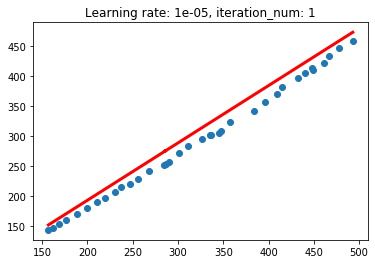

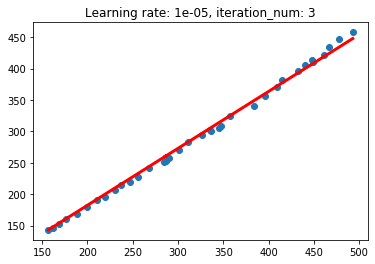

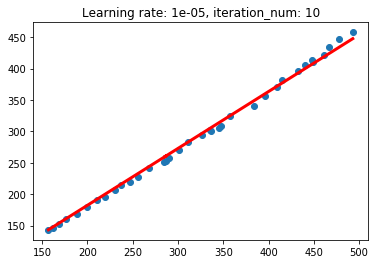

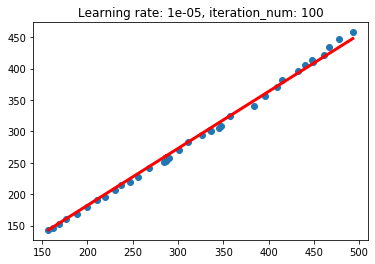

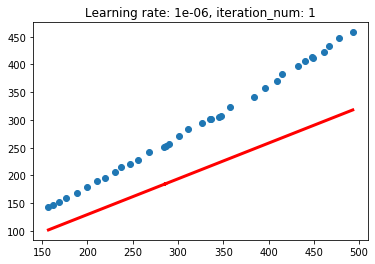

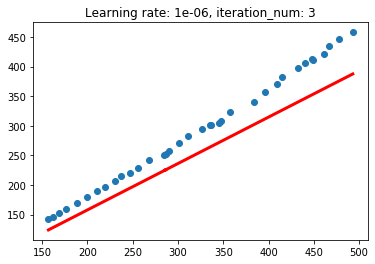

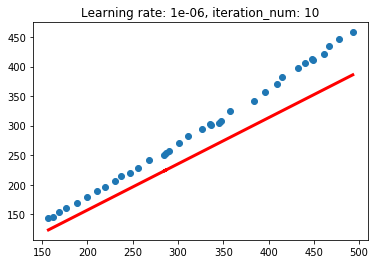

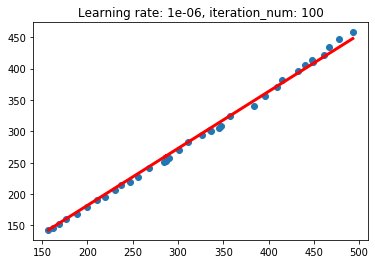

In [6]:
GD(x, y, learning_rate=0.00001, iteration_num=1)
GD(x, y, learning_rate=0.00001, iteration_num=3)
GD(x, y, learning_rate=0.00001, iteration_num=10)
GD(x, y, learning_rate=0.00001, iteration_num=100)
GD(x, y, learning_rate=0.000001, iteration_num=1)
GD(x, y, learning_rate=0.000001, iteration_num=3)
GD(x, y, learning_rate=0.000001, iteration_num=10)
GD(x, y, learning_rate=0.000001, iteration_num=100)